# Principle Component Analysis
This notebook will implement Principle Component Analysis with the cwurData dataset.



In [ ]:
#Import necessary libraries
import pandas as pd
data=pd.read_csv('cwurData.csv')
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# Data cleaning 


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [ ]:

data = data.drop(['institution', 'country','national_rank','year'], axis=1)
data.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,7,9,1,1,1,1,NaN,5,100.00
1,2,9,17,3,12,4,4,NaN,1,91.67
2,3,17,11,5,4,2,2,NaN,15,89.50
3,4,10,24,4,16,16,11,NaN,50,86.17
4,5,2,29,7,37,22,22,NaN,18,85.21


In [ ]:
data.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,7,9,1,1,1,1,NaN,5,100.00
1,2,9,17,3,12,4,4,NaN,1,91.67
2,3,17,11,5,4,2,2,NaN,15,89.50
3,4,10,24,4,16,16,11,NaN,50,86.17
4,5,2,29,7,37,22,22,NaN,18,85.21


In [ ]:
dataF=data.copy()
df=data.copy()
#filling NaN values on broad_impact with the mean of broad impact
dataF['broad_impact'] = dataF['broad_impact'].fillna(dataF['broad_impact'].mean())
df['broad_impact'] = df['broad_impact'].fillna(df['broad_impact'].mean())

print('Does some data have missing values?: \n'+str(dataF.isnull().any()))

Does some data have missing values?: 
world_rank              False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact            False
patents                 False
score                   False
dtype: bool


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Including necessary libraries
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

The next step is to select which features we want to use with PCA and standardize them.

In [ ]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(df.drop('world_rank',axis=1))
y = df['world_rank'].to_numpy()

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


Split into Train and Test data
To apply PCA, the data must be split into "training" and "test" data.

In [ ]:
#To apply PCA, the data must be split into "training" and "test" data.

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 40)

Instead of explicitly specifying the number of components we want to keep, we can set a threshold for the minimum amount of variance we want to retain in the data.

In [ ]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

#Fit the model with data
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 90 % of the variation, we needed 5 components


In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(1650, 5)
(550, 5)


# Impact Comparison across Regressors


LinearRegression() PCA:  LinearRegression()  MSE:  5937.13475
KNeighborsRegressor() PCA:  KNeighborsRegressor()  MSE:  2453.74858
DecisionTreeRegressor(max_depth=5) PCA:  DecisionTreeRegressor(max_depth=5)  MSE:  4214.86635
SVR() PCA:  SVR()  MSE:  14805.95375


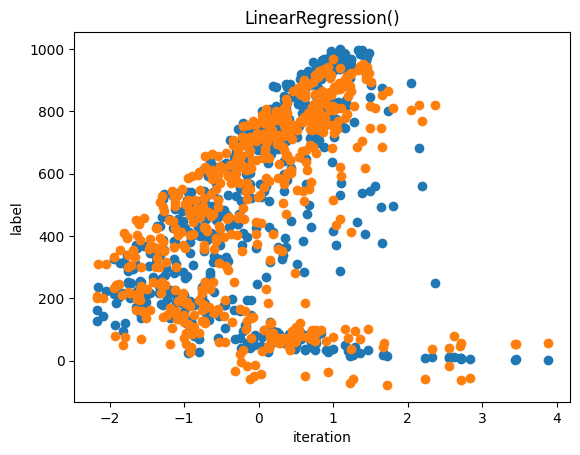

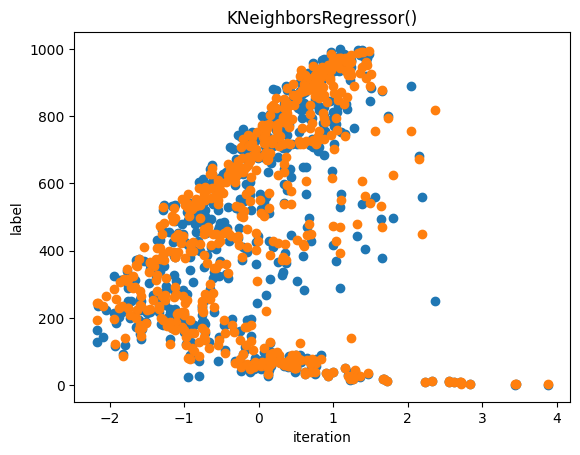

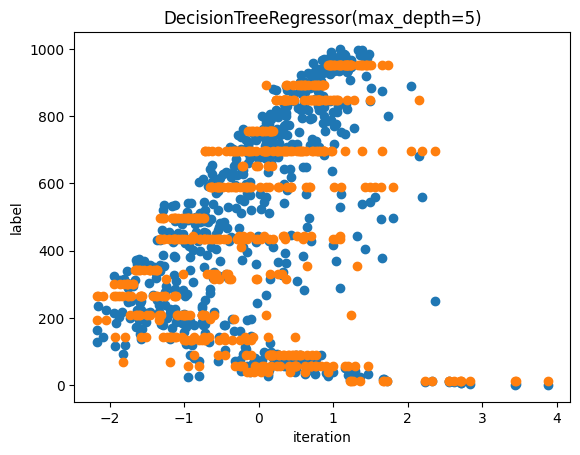

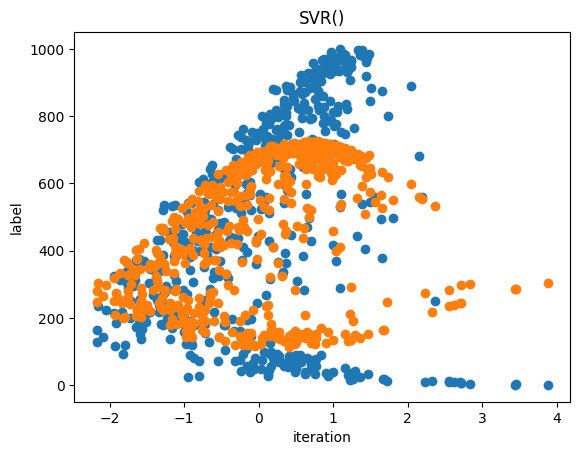

In [ ]:
#Load models
lin_reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(max_depth=5)
svm = SVR()

models = [lin_reg,knn,dt,svm]

#Visualize each model
for model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(model, "PCA: ", model," MSE: ", np.round(mean_squared_error(y_test, y_pred),5))
    for i in range(1, X_test_pca.shape[1]):
        if i == 1:
            fig,ax = plt.subplots(1,1)
            ax.scatter(X_test_pca[:,i], y_test, label = 'predicted')
            ax.scatter(X_test_pca[:,i], y_pred, label = 'actual')
            ax.set_title(model)
            ax.set_xlabel('iteration')
            ax.set_ylabel('label')

 After comparing the performance of different regressors with and without PCA, it can be concluded that KNeighborsRegressor performs the best with an MSE of 2453.75 when used with PCA. However, it is worth noting that PCA did not improve the performance of all the regressors, as the DecisionTreeRegressor and LinearRegression performed better without PCA. Additionally, the SVR model performed the worst with the highest MSE of 14805.95. 

The data below was pulled from the results in those notebooks so it is easier to visualize the impact of PCA with different algorithms. The focus of this comparison is more on the final accuracy and time the algorithm takes, rather than the visually comparing the datapoints (as in the regression comparison above).

In [ ]:
# Create a dictionary to store the results for each model
results = {}

# Load models
lin_reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(max_depth=5)
svm = SVR()

models = [('Linear Regression', lin_reg), ('KNN', knn), ('Decision Tree', dt), ('SVM', svm)]

# Iterate over each model and evaluate its performance
for name, model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = 1 - mse/np.var(y_test)
    results[name] = accuracy

# Print the results
for name, accuracy in results.items():
    print(f"{name} accuracy: {np.round(accuracy, 3)}")


Linear Regression accuracy: 0.935
KNN accuracy: 0.973
Decision Tree accuracy: 0.952
SVM accuracy: 0.839


In [ ]:
# create a list of models to evaluate
models = [lin_reg, knn, dt, svm]

# train and evaluate each model on the original features
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = model.score(X_test, y_test) # computes the R^2 coefficient of determination
    print(f"{model.__class__.__name__} without PCA:")
    print(f"MSE: {mse:.5f}")
    print(f"Accuracy: {accuracy:.5f}\n")


LinearRegression without PCA:
MSE: 5415.45031
Accuracy: 0.94097

KNeighborsRegressor without PCA:
MSE: 1967.62931
Accuracy: 0.97855

DecisionTreeRegressor without PCA:
MSE: 1572.56398
Accuracy: 0.98286

SVR without PCA:
MSE: 15441.45834
Accuracy: 0.83167



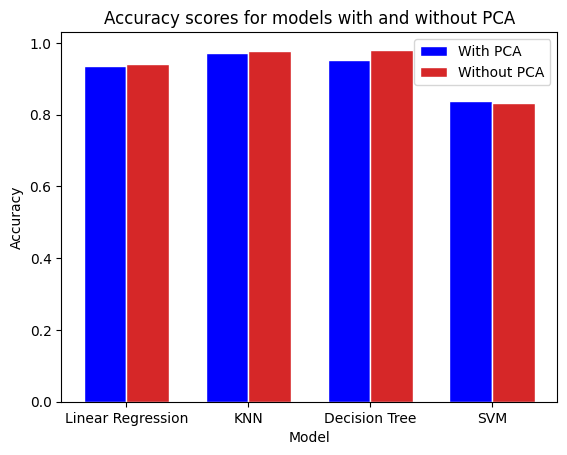

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for models with PCA
pca_scores = [0.935, 0.973, 0.952, 0.839]

# Accuracy scores for models without PCA
no_pca_scores = [0.94097, 0.97855, 0.98080, 0.83167]

# Labels for the x-axis (model names)
labels = ['Linear Regression', 'KNN', 'Decision Tree', 'SVM']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(pca_scores))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, pca_scores, color='blue', width=bar_width, edgecolor='white', label='With PCA')
plt.bar(r2, no_pca_scores, color='#d62728', width=bar_width, edgecolor='white', label='Without PCA')

# Add x-axis labels and title
plt.xlabel('Model')
plt.xticks([r + bar_width/2 for r in range(len(pca_scores))], labels)
plt.ylabel('Accuracy')
plt.title('Accuracy scores for models with and without PCA')

# Add a legend and display the plot
plt.legend()
plt.show()


In [ ]:
import time

# calculate train time without PCA
train_time_no_pca = []
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time_no_pca.append(end_time - start_time)

# calculate train time with PCA
train_time_with_pca = []
for model in models:
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    end_time = time.time()
    train_time_with_pca.append(end_time - start_time)



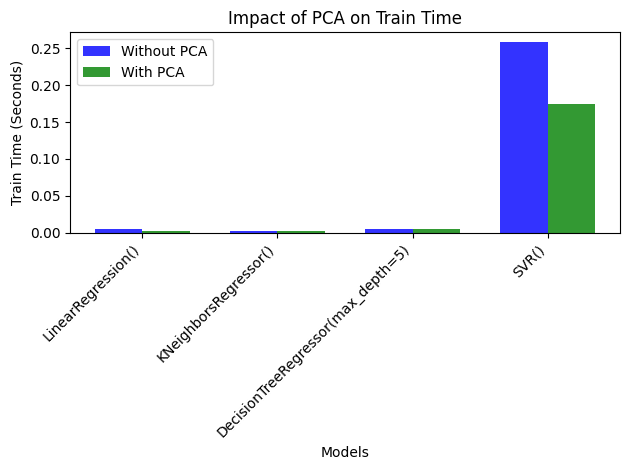

In [ ]:
# plot the train time comparison
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = np.arange(len(models))

rects1 = ax.bar(index, train_time_no_pca, bar_width,
                alpha=opacity,
                color='b',
                label='Without PCA')

rects2 = ax.bar(index + bar_width, train_time_with_pca, bar_width,
                alpha=opacity,
                color='g',
                label='With PCA')

plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Models')
ax.set_ylabel('Train Time (Seconds)')
ax.set_title('Impact of PCA on Train Time')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


In KNN, Decision tree regressor, train time is almost similar with or wothout PCA. For  logistic regression and SVR train time improved by implementing PCA